In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential,load_model
import keras
import os

In [20]:
train_images = pd.read_csv("C:\\Django\\Handwritten Digit Recognition\\handwrittendigitdata\\emnist-balanced-train.csv",header=None)
test_images = pd.read_csv("C:\\Django\\Handwritten Digit Recognition\\handwrittendigitdata\\emnist-balanced-test.csv",header=None)
map_images = pd.read_csv("C:\\Django\\Handwritten Digit Recognition\\handwrittendigitdata\\emnist-balanced-mapping.txt",header=None) 
#The 1st row would be treated as header if not set header to none.

## EMNIST-Balanced(Extended MNIST) Dataset CSV Structure :
* Each row represents a single image of shape -> (1,784) There are a total of 784 columns.
* The first column contains the labels for each image 
* **Example** : The 0th row in the above dataframe represents and image the pixel for this image starts from 1st column and the point (1,0) i.e 36 is the label for this image in the 0th column.
* In the map_images.txt file 36 maps to 97 which is ASCII Value for "a".
* 47 Labels in map_images represent digits(0->9),alphabets(A-Z & a,b,d,..t).

In [21]:
train_images

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


a


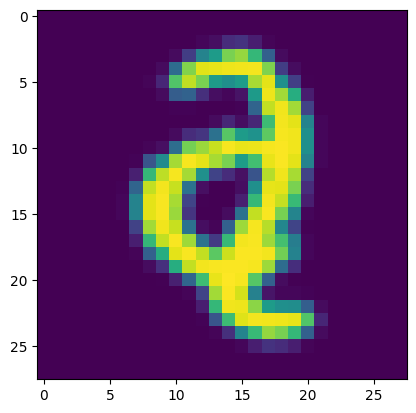

In [22]:
plt.imshow(np.rot90(np.fliplr(train_images.iloc[1,1:].values.reshape(28,28)))) ## We'll learn about this later
print(chr(97)) # 36 in labels column maps to 36 --> 97 in map_images 

## **Data Preprocessing**

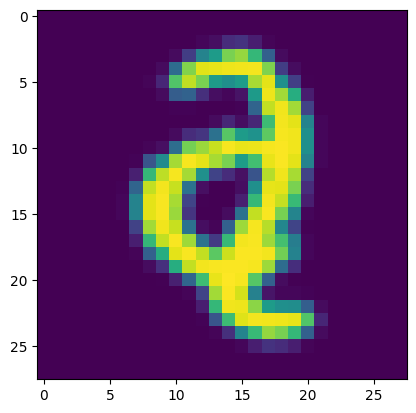

In [23]:
# Seperating labels from features in training and test data.
train_x = train_images.iloc[:,1:]  
train_y = train_images.iloc[:,0]  
train_x = train_x.values

test_x = test_images.iloc[:,1:]
test_y = test_images.iloc[:,0]
test_x = test_x.values

# ascii_map just for the convenince, i've removed the first column in map_images.
ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])

# Uncomment the below line to know about the labels present in our dataset
# for i in ascii_map: 
#     print(chr(int(i)))
plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))

In [24]:
# The images in train_images are not in a proper orientation,hence to make them appropriate for training & testing data.

def rot_flip(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

(112800, 28, 28)

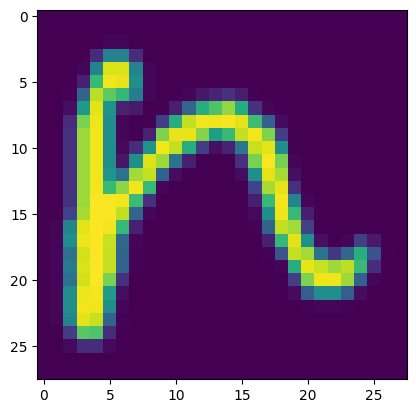

In [25]:
train_x = np.apply_along_axis(rot_flip,1,train_x)
test_x = np.apply_along_axis(rot_flip,1,test_x)
plt.imshow(train_x[2])
train_x.shape

In [26]:
train_x = train_x.astype('float32')
train_x = train_x/255.0

test_x = test_x.astype('float32')
test_x = test_x/255.0

train_x = train_x.reshape(-1, 28,28, 1)   #Equivalent to (112800,28,28,1)
test_x = test_x.reshape(-1, 28,28, 1)   #Equivalent to (18800,28,28,1)

In [27]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (28,28,1),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(47,activation='softmax'))

In [28]:
model.compile(optimizer = 'adam',loss= "sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [29]:
history = model.fit(
    train_x,
    train_y,
    validation_data = (test_x,test_y),
    epochs = 20,
)

Epoch 1/20
3525/3525 [==============================] - 20s 6ms/step - loss: 1.0661 - accuracy: 0.6749 - val_loss: 0.4831 - val_accuracy: 0.8387
Epoch 2/20
3525/3525 [==============================] - 19s 5ms/step - loss: 0.6615 - accuracy: 0.7824 - val_loss: 0.4260 - val_accuracy: 0.8546
Epoch 3/20
3525/3525 [==============================] - 19s 5ms/step - loss: 0.5763 - accuracy: 0.8084 - val_loss: 0.4026 - val_accuracy: 0.8618
Epoch 4/20
3525/3525 [==============================] - 19s 5ms/step - loss: 0.5284 - accuracy: 0.8208 - val_loss: 0.3890 - val_accuracy: 0.8678
Epoch 5/20
3525/3525 [==============================] - 19s 5ms/step - loss: 0.4942 - accuracy: 0.8313 - val_loss: 0.3833 - val_accuracy: 0.8687
Epoch 6/20
3525/3525 [==============================] - 19s 5ms/step - loss: 0.4679 - accuracy: 0.8387 - val_loss: 0.3747 - val_accuracy: 0.8727
Epoch 7/20
3525/3525 [==============================] - 19s 5ms/step - loss: 0.4467 - accuracy: 0.8456 - val_loss: 0.3774 - val_ac

In [30]:
ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])


# Adding character to associated ASCII Value
character = []
for i in ascii_map:
    character.append(chr(int(i)))
# plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))
character = pd.DataFrame(character)

In [31]:
ascii_map = pd.DataFrame(ascii_map)
ascii_map["Character"] = character
ascii_map.to_csv("mapping.csv",index=False,header=True)

(28, 28, 3)
1/1 [==============================] - 0s 63ms/step
Prediction :  3


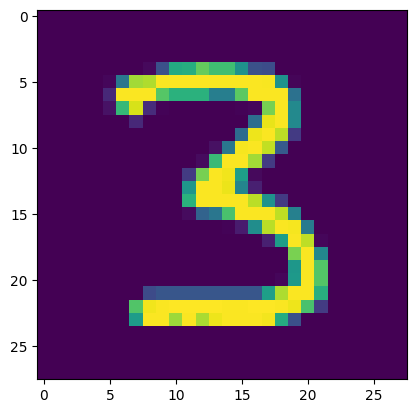

In [32]:
from tensorflow.keras.utils import load_img, img_to_array
import cv2

img_sh_lst = []
img = load_img("C:\\Users\\gouth\\OneDrive\\Desktop\\0_kKxxK1YXSyWMEBtS.png",target_size=(28,28))
x = img_to_array(img)
print(x.shape)
x = x/255.0

gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
gray_image = np.expand_dims(gray_image, axis=-1)
plt.imshow(gray_image)
gray_image = np.expand_dims(gray_image, axis=0)
cl = model.predict(gray_image)
cl = list(cl[0])

print("Prediction : ",ascii_map["Character"][cl.index(max(cl))])


In [33]:
print(tf.__version__)

2.10.1


In [34]:
# Directory where you want to save the model
save_directory = "C:\\Django\\Handwritten Digit Recognition\\Assets\\Model"
os.makedirs(save_directory, exist_ok=True)  # Create the directory if it doesn't exist

# Full path to save the model
model_path = os.path.join(save_directory, "handwrittenmodel.h5")

# Save the model in .h5 format
model.save(model_path)

print(f"Model saved to {model_path}")

Model saved to C:\Django\Handwritten Digit Recognition\Assets\Model\handwrittenmodel.h5
